In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, log_loss, confusion_matrix)
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


In [4]:
#read the data
df=pd.read_csv("C:\\doc\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


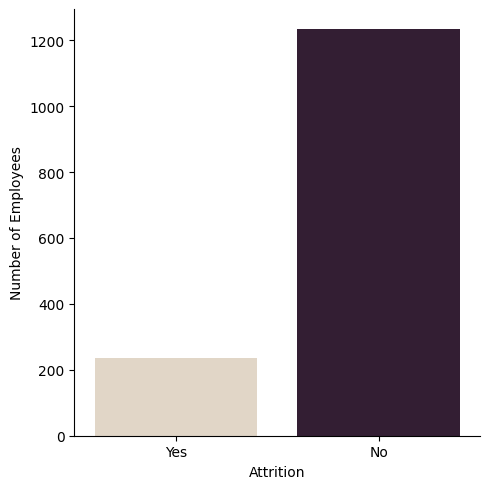

In [23]:
#checking the number of yes and no in attrition
ax=sns.catplot(x="Attrition" , kind="count", palette="ch:.25", data=df)
ax.set(xlabel="Attrition" , ylabel= "Number of Employees")
plt.show()

In [25]:
# identifying column with missing information
missing_col= df.columns[df.isnull().any()].values
print("Missing column in the datasets",missing_col)

Missing column in the datasets []


### Feature engineering 
Numeric and categorical fields need to be treated separately. Following few steps separate numeric and categorical field 

In [32]:
### Extracting numerical and categorical variable
df_num=pd.DataFrame(data=df.select_dtypes(include=['int64']))
df_cat=pd.DataFrame(data=df.select_dtypes(include=['object']))
print("Shape of numeric",df_num.shape)
print("Shape of categorical:", df_cat.shape)
df_cat.head(5)

Shape of numeric (1470, 26)
Shape of categorical: (1470, 9)


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


###Encode the categorical data

### Categorical fields have been encoded using get_dummies function

In [46]:
# Dropping 'Attrition'  from df_cat before  encoding
df_cat=df_cat.drop(['Attrition'], axis=1)

KeyError: "['Attrition'] not found in axis"

In [53]:
#Encoding using pandas get_dummies
df_cat_encoded=pd.get_dummies(df_cat, dtype=int)
df_cat_encoded.head(5)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


###Scaling numeric field
# The nuemric field has been scaled next for best results. Standard scaler has been used for the same Post scaling of the nuemric features they are merged with categorical ones.


In [49]:
# Using standard Scalar to scale the numeric features
standard_scaler= StandardScaler()
df_num_scaled=standard_scaler.fit_transform(df_num)
df_num_scaled=pd.DataFrame(data=df_num_scaled, columns=df_num.columns, index=df_num.index)
print("shape of numeric after scaling:",df_num_scaled.shape)
print("shape of categorical after encoding",df_cat_encoded.shape)

shape of numeric after scaling: (1470, 26)
shape of categorical after encoding (1470, 29)


In [55]:
## Combining categorical  and numeric features
df_tranform_final=pd.concat([df_num_scaled,df_cat_encoded], axis=1)
print("final shape dataframe",df_tranform_final)

final shape dataframe            Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0     0.446350   0.742527         -1.010909  -0.891688            0.0   
1     1.322365  -1.297775         -0.147150  -1.868426            0.0   
2     0.008343   1.414363         -0.887515  -0.891688            0.0   
3    -0.429664   1.461466         -0.764121   1.061787            0.0   
4    -1.086676  -0.524295         -0.887515  -1.868426            0.0   
...        ...        ...               ...        ...            ...   
1465 -0.101159   0.202082          1.703764  -0.891688            0.0   
1466  0.227347  -0.469754         -0.393938  -1.868426            0.0   
1467 -1.086676  -1.605183         -0.640727   0.085049            0.0   
1468  1.322365   0.546677         -0.887515   0.085049            0.0   
1469 -0.320163  -0.432568         -0.147150   0.085049            0.0   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0          -1.701283    

In [70]:
##Extracting target
target=df['Attrition']

#Mapping yes to 1 and no to 0
map={'Yes':1, 'No':0}
target=target.apply(lambda x: map[x])
print("shape of target:",target.shape)
X = df_tranform_final
Y = target


shape of target: (1470,)


In [75]:
X_train, Y_Train, X_test,Y_test=train_test_split(X,Y,train_size=0.8, random_state=42,stratify=Y)
print("X_train shape:",X_train)
print("Y-Train shape:",Y_Train)
print("X_test shape:",X_test)
print("Y_test shape:",Y_test)

X_train shape:            Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
1194  1.103362   1.047456         -0.887515   1.061787            0.0   
128  -1.634185  -0.516857         -0.887515  -1.868426            0.0   
810   0.993860  -0.982929         -0.764121  -1.868426            0.0   
478  -1.305679  -0.447443          0.469821  -1.868426            0.0   
491   0.665354   0.492137         -0.023755   2.038524            0.0   
...        ...        ...               ...        ...            ...   
1213 -1.524683  -0.930867         -0.270544   0.085049            0.0   
963   0.117845   0.511970         -0.887515  -0.891688            0.0   
734  -1.634185  -1.451479         -0.147150  -1.868426            0.0   
1315 -0.101159  -0.923430         -0.887515   1.061787            0.0   
1292  0.227347  -0.090452          1.333581   0.085049            0.0   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
1194        1.081943           